In [124]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [125]:
df = pd.read_csv(r"C:\Users\egupta\Desktop\DAX-DS-Assignment-2022-Esha_Gupta\Data_Analytics\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [126]:
print("Total number of records : ",len(df))
df.head()

Total number of records :  5110


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [127]:
print("Total null records in the dataframe : ",df.isna().sum().sum())
print("Attribute-wise null records")
df.isna().sum()

Total null records in the dataframe :  201
Attribute-wise null records


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [128]:
df.columns

numerics = ['int','float']
numeric_col = list(df.select_dtypes(include=numerics).columns)
numeric_col

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [129]:
for col in numeric_col:
    print("For Attribute Name: ",col)
    print("Mean: ",round(df[col].mean(),4))
    print("Median: ",round(df[col].median(),4))
    print("Standard Deviation: ",round(df[col].std(),4))
    print()

For Attribute Name:  id
Mean:  36517.8294
Median:  36932.0
Standard Deviation:  21161.7216

For Attribute Name:  age
Mean:  43.2266
Median:  45.0
Standard Deviation:  22.6126

For Attribute Name:  hypertension
Mean:  0.0975
Median:  0.0
Standard Deviation:  0.2966

For Attribute Name:  heart_disease
Mean:  0.054
Median:  0.0
Standard Deviation:  0.2261

For Attribute Name:  avg_glucose_level
Mean:  106.1477
Median:  91.885
Standard Deviation:  45.2836

For Attribute Name:  bmi
Mean:  28.8932
Median:  28.1
Standard Deviation:  7.8541

For Attribute Name:  stroke
Mean:  0.0487
Median:  0.0
Standard Deviation:  0.2153



In [130]:
1	Plot charts and explain them in words(min 2 charts) (3)
2	Check if “BMI” column has null values? what is the percentage of null values ? use data engineering method to fill the null values. (3)
3	Remove outliers from any two numerical columns using any appropriate ML technique(3)
4	Perform Scaling on all numerical columns(3)
5	Perform Encoding on all categorical columns(3)
6	Generate at least 2 new features using existing features of your choice(3).
 
 


SyntaxError: invalid syntax (1751067649.py, line 1)

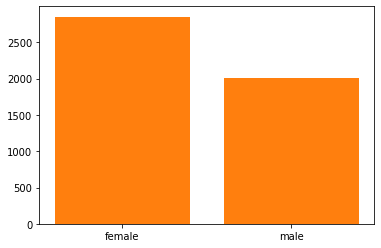

In [131]:
#

femaleStrokeCount = len(df[(df['gender'] == 'Female') & (df['stroke'] == 1)])
maleStrokeCount = len(df[(df['gender'] == 'Male') & (df['stroke'] == 1)])
totalFemaleCount = len(df[(df['gender'] == 'Female')])
totalMaleCount = len(df[(df['gender'] == 'Male')])

# fig, ax = plt.subplots(figsize =(10, 7))
# ax.hist([femaleStrokeCount,maleStrokeCount], bins = ['female','male'])
fig, ax = plt.subplots()
ax.bar(['female','male'], [femaleStrokeCount,maleStrokeCount],label='Women')
ax.bar(['female','male'], [totalFemaleCount-femaleStrokeCount,totalMaleCount-maleStrokeCount],label='Womn')
# plt.xlabel("Gender")
# plt.ylabel("Stroke Count")
# plt.title("Number of people voted in each year")
plt.show()


In [132]:
print("Total no of Null values in BMI attribute: ",df['bmi'].isna().sum())
print("Percentage of Null values in BMI attribute: ",(df['bmi'].isna().sum()/len(df['bmi']))*100)

Total no of Null values in BMI attribute:  201
Percentage of Null values in BMI attribute:  3.9334637964774952


# Missing values 
First the plotting the distribution plot for the BMI attribute. From the plot, we can see that the data is not symmetric so using mean for replacing the mean value will not be the right choice. So, for replacing the missing values, using median.  

C:\Users\egupta\Desktop\DAX-DS-Assignment-2022-Esha_Gupta\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

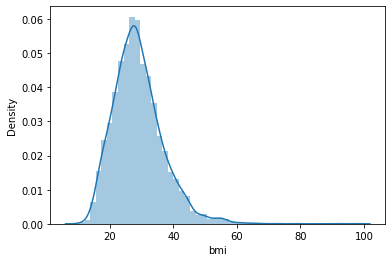

In [133]:
sns.distplot(df.bmi)
# Mean:  28.8932
# Median:  28.1
# Standard Deviation:  7.8541

In [134]:
df['bmi'] = df['bmi'].replace(np.NaN,df['bmi'].median())
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Removing Outliers

First, checking the distribution plot for every numeric attributes to see which attributes have outliers. From the numeric attributes, I have plotted the distribution plot for avg_glucose_level and bmi.

C:\Users\egupta\Desktop\DAX-DS-Assignment-2022-Esha_Gupta\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

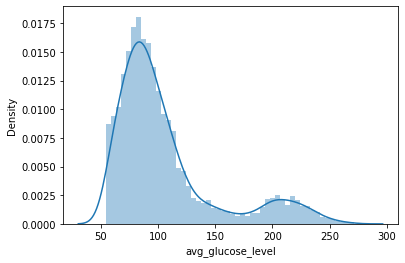

In [135]:
sns.distplot(df.avg_glucose_level)

C:\Users\egupta\Desktop\DAX-DS-Assignment-2022-Esha_Gupta\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

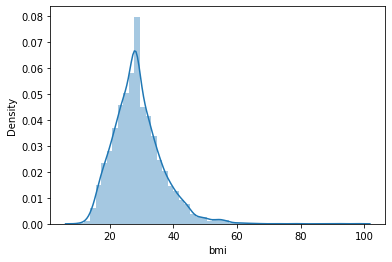

In [136]:
sns.distplot(df.bmi)

C:\Users\egupta\Desktop\DAX-DS-Assignment-2022-Esha_Gupta\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

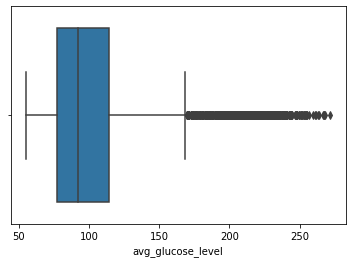

In [137]:
sns.boxplot(df['avg_glucose_level'])

In [138]:
# Detecting outliers with z-score

def detectOutliers(attrData):
    outliers = []
    threshold = 3
    dataMean = np.mean(attrData)
    dataStd = np.std(attrData)

    for data in attrData:
        zScore = ( data - dataMean) / dataStd
        if abs(zScore) > threshold:
            outliers.append(data)
    return outliers
    
# detecting the outliers datapoints for 
outliers_attr = ['bmi','avg_glucose_level']

print('For attribute: bmi')
bmi_outliers = detectOutliers(df['bmi'])
print("Outliers data points: ",bmi_outliers)
print("total outliers: ",len(bmi_outliers))

print('\nFor attribute: avg_glucose_level')
glucoselevel_outliers = detectOutliers(df['avg_glucose_level'])
print("Outliers data points: ",glucoselevel_outliers)
print("total outliers: ",len(glucoselevel_outliers))
    
    
    


For attribute: bmi
Outliers data points:  [56.6, 54.6, 60.9, 54.7, 64.8, 54.7, 60.2, 71.9, 54.6, 55.7, 55.7, 57.5, 54.2, 52.3, 78.0, 53.4, 55.2, 55.0, 54.8, 52.8, 66.8, 55.1, 55.9, 57.3, 56.0, 57.7, 54.0, 56.1, 97.6, 53.9, 53.8, 52.7, 52.8, 55.7, 53.5, 63.3, 52.8, 61.2, 58.1, 52.7, 53.4, 59.7, 52.5, 52.9, 54.7, 61.6, 53.8, 54.3, 55.0, 57.2, 64.4, 92.0, 55.9, 57.9, 55.7, 57.2, 60.9, 54.1, 56.6]
total outliers:  59

For attribute: avg_glucose_level
Outliers data points:  [252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.73, 243.59, 250.8, 255.17, 267.61, 260.85, 248.37, 263.56, 247.97, 248.24, 253.93, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86]
total outliers:  49


In [139]:
# Replacing the values with median

median = df['avg_glucose_level'].median()
for i in glucoselevel_outliers:
    df.loc[(df['avg_glucose_level'] == i),'avg_glucose_level']= median

In [140]:
for i in glucoselevel_outliers:
    df.drop(df.index[df['avg_glucose_level'] == i],inplace=True)

C:\Users\egupta\Desktop\DAX-DS-Assignment-2022-Esha_Gupta\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

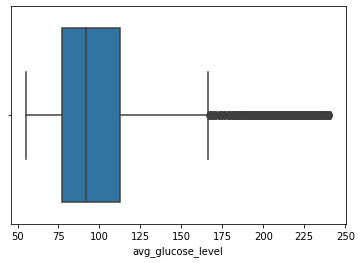

In [141]:
sns.boxplot(df['avg_glucose_level'])

In [142]:
for i in bmi_outliers:
    df.drop(df.index[df['bmi'] == i],inplace=True)

C:\Users\egupta\Desktop\DAX-DS-Assignment-2022-Esha_Gupta\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

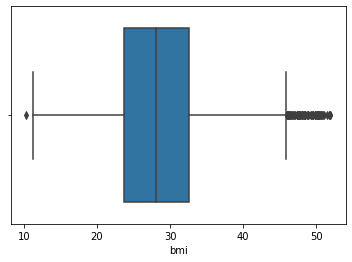

In [143]:
sns.boxplot(df.bmi)

In [144]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Feature Scaling
Feature scaling is done using Min-max scaler which scales down the values of numeric attributes to 0 and 1. Numeric attributes considered are id, age, avg_glucose_level and bmi. Other numeric attributes are not considered, as there values are already binary values.

In [147]:
scaler = MinMaxScaler()
cols = ['id','age','avg_glucose_level','bmi']
df[cols] = scaler.fit_transform(df[cols])

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,Male,0.816895,0,1,Yes,Private,Urban,0.934478,0.632212,formerly smoked,1
1,0.708205,Female,0.743652,0,0,Yes,Self-employed,Rural,0.791913,0.427885,never smoked,1
2,0.426015,Male,0.975586,0,1,Yes,Private,Rural,0.273501,0.533654,never smoked,1
3,0.824928,Female,0.597168,0,0,Yes,Private,Urban,0.625121,0.579327,smokes,1
4,0.021929,Female,0.963379,1,0,Yes,Self-employed,Rural,0.640681,0.329327,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.249297,Female,0.975586,1,0,Yes,Private,Urban,0.154140,0.427885,never smoked,0
5106,0.614850,Female,0.987793,0,0,Yes,Self-employed,Urban,0.377302,0.713942,never smoked,0
5107,0.269730,Female,0.426270,0,0,Yes,Self-employed,Rural,0.150048,0.487981,never smoked,0
5108,0.514278,Male,0.621582,0,0,Yes,Private,Rural,0.598525,0.367788,formerly smoked,0


# Encoding

In [149]:
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [150]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1,0.816895,0,1,1,2,1,0.934478,0.632212,1,1
1,0.708205,0,0.743652,0,0,1,3,0,0.791913,0.427885,2,1
2,0.426015,1,0.975586,0,1,1,2,0,0.273501,0.533654,2,1
3,0.824928,0,0.597168,0,0,1,2,1,0.625121,0.579327,3,1
4,0.021929,0,0.963379,1,0,1,3,0,0.640681,0.329327,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.249297,0,0.975586,1,0,1,2,1,0.154140,0.427885,2,0
5106,0.614850,0,0.987793,0,0,1,3,1,0.377302,0.713942,2,0
5107,0.269730,0,0.426270,0,0,1,3,0,0.150048,0.487981,2,0
5108,0.514278,1,0.621582,0,0,1,2,0,0.598525,0.367788,1,0
